# Getting Started with Enterprise Data Analysis

Welcome to the Enterprise Data Analysis Cognitive Architecture! This notebook will guide you through your first analysis using our advanced analytics platform.

## What You'll Learn
- How to load different types of data files
- Basic data exploration and quality assessment
- Creating your first statistical analysis
- Generating visualizations and reports

## Prerequisites
- Python environment with required packages installed
- Sample data files (we'll create some if needed)

Let's get started! 🚀

## 1. Environment Setup and Imports

First, let's import the core components of our analysis platform:

In [1]:
# Core data analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
from scipy.stats import pearsonr, f_oneway
import json
from datetime import datetime

# Additional libraries for comprehensive analysis
try:
    import pyreadstat  # For SPSS files
    SPSS_AVAILABLE = True
except ImportError:
    SPSS_AVAILABLE = False
    print("⚠️ pyreadstat not available - SPSS file support limited")

# Configuration
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

print("✅ All imports successful!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"📊 Seaborn version: {sns.__version__}")

✅ All imports successful!
📊 Pandas version: 2.3.1
🔢 NumPy version: 2.2.6
📈 Matplotlib version: 3.10.3
📊 Seaborn version: 0.13.2


## 2. Create Sample Data

Let's create some sample data to work with. In real scenarios, you'd load your own data files.

In [2]:
# Create sample survey data
np.random.seed(42)  # For reproducible results

n_responses = 500

# Generate realistic survey data
sample_data = {
    'respondent_id': range(1, n_responses + 1),
    'age': np.random.normal(35, 12, n_responses).astype(int),
    'satisfaction_score': np.random.normal(7.2, 1.8, n_responses),
    'department': np.random.choice(['Sales', 'Marketing', 'IT', 'HR', 'Finance'], n_responses),
    'years_experience': np.random.exponential(5, n_responses),
    'training_completed': np.random.choice([True, False], n_responses, p=[0.7, 0.3]),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_responses)
}

# Clean up the data
sample_data['age'] = np.clip(sample_data['age'], 18, 65)
sample_data['satisfaction_score'] = np.clip(sample_data['satisfaction_score'], 1, 10)
sample_data['years_experience'] = np.clip(sample_data['years_experience'], 0, 40)

# Create DataFrame
df = pd.DataFrame(sample_data)

print(f"📈 Created sample dataset with {len(df)} responses")
print(f"📊 Columns: {list(df.columns)}")
df.head()

📈 Created sample dataset with 500 responses
📊 Columns: ['respondent_id', 'age', 'satisfaction_score', 'department', 'years_experience', 'training_completed', 'region']


,respondent_id,age,satisfaction_score,department,years_experience,training_completed,region
0,1,40,8.867,HR,4.662,True,South
1,2,33,10.000,Sales,0.749,False,South
2,3,42,4.683,IT,11.427,True,East
3,4,53,8.213,Finance,8.840,False,North
4,5,32,6.029,IT,1.910,True,East


## 3. Data Loading with DataLoader

Let's use our enterprise DataLoader to save and reload the data, demonstrating the platform's capabilities:

In [3]:
# Create data directory and save sample data
data_dir = Path('../data')
data_dir.mkdir(exist_ok=True)

# Save as CSV
csv_path = data_dir / 'sample_survey.csv'
df.to_csv(csv_path, index=False)

# Save as Excel
excel_path = data_dir / 'sample_survey.xlsx'
df.to_excel(excel_path, index=False)

print(f"💾 Data saved to:")
print(f"  CSV: {csv_path}")
print(f"  Excel: {excel_path}")

# Load data back using pandas
loaded_data = pd.read_csv(csv_path)

print(f"\n📂 Loaded data shape: {loaded_data.shape}")
print(f"📊 Data types:")
print(loaded_data.dtypes)

# Ensure proper data types
loaded_data['training_completed'] = loaded_data['training_completed'].astype(bool)
print(f"\n✅ Data loaded and types corrected successfully!")

💾 Data saved to:
  CSV: ..\data\sample_survey.csv
  Excel: ..\data\sample_survey.xlsx

📂 Loaded data shape: (500, 7)
📊 Data types:
respondent_id           int64
age                     int64
satisfaction_score    float64
department             object
years_experience      float64
training_completed       bool
region                 object
dtype: object

✅ Data loaded and types corrected successfully!


## 4. Data Exploration and Quality Assessment

Now let's explore our data and assess its quality using the StatisticalAnalyzer:

In [4]:
# Data overview function
def get_data_overview(df):
    """Generate comprehensive data overview"""
    overview = {
        'shape': df.shape,
        'memory_usage': df.memory_usage(deep=True).sum() / 1024**2,  # MB
        'missing_values': df.isnull().sum().sum(),
        'duplicates': df.duplicated().sum(),
        'column_info': {}
    }
    
    for col in df.columns:
        overview['column_info'][col] = {
            'dtype': str(df[col].dtype),
            'unique_values': df[col].nunique(),
            'missing_count': df[col].isnull().sum(),
            'missing_percent': (df[col].isnull().sum() / len(df)) * 100
        }
    
    return overview

# Get data overview
overview = get_data_overview(loaded_data)

print("📋 DATA OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {overview['shape']}")
print(f"Memory Usage: {overview['memory_usage']:.2f} MB")
print(f"Missing Values: {overview['missing_values']}")
print(f"Duplicate Rows: {overview['duplicates']}")

print("\n📊 COLUMN INFORMATION")
print("=" * 50)
for col, info in overview['column_info'].items():
    missing_info = f" ({info['missing_count']} missing)" if info['missing_count'] > 0 else ""
    print(f"{col}: {info['dtype']} ({info['unique_values']} unique values{missing_info})")

📋 DATA OVERVIEW
Dataset Shape: (500, 7)
Memory Usage: 0.07 MB
Missing Values: 0
Duplicate Rows: 0

📊 COLUMN INFORMATION
respondent_id: int64 (500 unique values)
age: int64 (47 unique values)
satisfaction_score: float64 (467 unique values)
department: object (5 unique values)
years_experience: float64 (500 unique values)
training_completed: bool (2 unique values)
region: object (4 unique values)


In [5]:
# Data quality assessment function
def assess_data_quality(df):
    """Perform comprehensive data quality assessment"""
    
    # Calculate quality metrics
    completeness = (1 - (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]))) * 100
    uniqueness = (1 - (df.duplicated().sum() / len(df))) * 100
    consistency = 95  # Base score for data type consistency
    
    # Overall quality score (weighted average)
    overall_score = (completeness * 0.4 + uniqueness * 0.3 + consistency * 0.3)
    
    # Identify issues
    issues = []
    if completeness < 95:
        missing_pct = 100 - completeness
        issues.append(f"Missing data: {missing_pct:.1f}% of values are missing")
    
    if uniqueness < 100:
        dup_pct = 100 - uniqueness
        issues.append(f"Duplicate records: {dup_pct:.1f}% of records are duplicates")
    
    # Check for potential data issues
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].count() > 0:
            # Check for extreme outliers
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR
            extreme_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            
            if extreme_outliers > len(df) * 0.05:  # More than 5% extreme outliers
                issues.append(f"Potential data quality issue in {col}: {extreme_outliers} extreme outliers")
    
    return {
        'overall_score': round(overall_score, 1),
        'metrics': {
            'completeness': round(completeness, 1),
            'uniqueness': round(uniqueness, 1),
            'consistency': round(consistency, 1)
        },
        'issues': issues
    }

# Perform data quality assessment
quality_report = assess_data_quality(loaded_data)

print("🔍 DATA QUALITY ASSESSMENT")
print("=" * 50)
print(f"Overall Quality Score: {quality_report['overall_score']}/100")

print("\n📈 Quality Metrics:")
for metric, score in quality_report['metrics'].items():
    status = "✅" if score >= 80 else "⚠️" if score >= 60 else "❌"
    print(f"  {status} {metric.title()}: {score}/100")

if quality_report['issues']:
    print("\n⚠️ Issues Found:")
    for issue in quality_report['issues']:
        print(f"  • {issue}")
else:
    print("\n✅ No major data quality issues detected!")

🔍 DATA QUALITY ASSESSMENT
Overall Quality Score: 98.5/100

📈 Quality Metrics:
  ✅ Completeness: 100.0/100
  ✅ Uniqueness: 100.0/100
  ✅ Consistency: 95/100

✅ No major data quality issues detected!


## 5. Descriptive Statistics

Let's generate comprehensive descriptive statistics for our dataset:

In [6]:
# Generate descriptive statistics function
def generate_descriptive_stats(df):
    """Generate comprehensive descriptive statistics"""
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns
    
    results = {}
    
    # Numeric variables summary
    if len(numeric_cols) > 0:
        numeric_summary = {}
        for col in numeric_cols:
            if df[col].count() > 0:  # Only if there are non-null values
                data = df[col].dropna()
                numeric_summary[col] = {
                    'count': len(data),
                    'mean': data.mean(),
                    'std': data.std(),
                    'min': data.min(),
                    'q1': data.quantile(0.25),
                    'median': data.median(),
                    'q3': data.quantile(0.75),
                    'max': data.max(),
                    'skewness': stats.skew(data),
                    'kurtosis': stats.kurtosis(data)
                }
        results['numeric_summary'] = numeric_summary
    
    # Categorical variables summary
    if len(categorical_cols) > 0:
        categorical_summary = {}
        for col in categorical_cols:
            value_counts = df[col].value_counts()
            categorical_summary[col] = {
                'unique_count': df[col].nunique(),
                'mode': value_counts.index[0] if len(value_counts) > 0 else None,
                'mode_frequency': value_counts.iloc[0] if len(value_counts) > 0 else 0,
                'value_counts': value_counts.to_dict()
            }
        results['categorical_summary'] = categorical_summary
    
    return results

# Generate descriptive statistics
desc_stats = generate_descriptive_stats(loaded_data)

print("📊 DESCRIPTIVE STATISTICS SUMMARY")
print("=" * 60)

# Display numeric variable statistics
if 'numeric_summary' in desc_stats:
    print("\n🔢 Numeric Variables:")
    numeric_df = pd.DataFrame(desc_stats['numeric_summary']).round(2)
    print(numeric_df)

# Display categorical variable statistics
if 'categorical_summary' in desc_stats:
    print("\n📂 Categorical Variables:")
    for var, stats in desc_stats['categorical_summary'].items():
        print(f"\n  {var}:")
        print(f"    Unique values: {stats['unique_count']}")
        print(f"    Most common: {stats['mode']} ({stats['mode_frequency']} occurrences)")
        print(f"    Distribution:")
        # Show top 5 categories
        for i, (category, count) in enumerate(list(stats['value_counts'].items())[:5]):
            percentage = (count / len(loaded_data)) * 100
            print(f"      {category}: {count} ({percentage:.1f}%)")
        if len(stats['value_counts']) > 5:
            print(f"      ... and {len(stats['value_counts']) - 5} more categories")

📊 DESCRIPTIVE STATISTICS SUMMARY

🔢 Numeric Variables:
          respondent_id     age  satisfaction_score  years_experience
count           500.000 500.000             500.000           500.000
mean            250.500  34.890               7.210             4.890
std             144.480  10.970               1.660             4.920
min               1.000  18.000               2.350             0.000
q1              125.750  26.000               6.130             1.280
median          250.500  35.000               7.250             3.340
q3              375.250  42.000               8.370             6.920
max             500.000  65.000              10.000            29.180
skewness          0.000   0.350              -0.210             1.760
kurtosis         -1.200  -0.430              -0.430             3.520

📂 Categorical Variables:

  department:
    Unique values: 5
    Most common: HR (111 occurrences)
    Distribution:
      HR: 111 (22.2%)
      Marketing: 110 (22.0%)
      

## 6. Basic Visualizations

Now let's create some visualizations using the EnterpriseVisualizer:

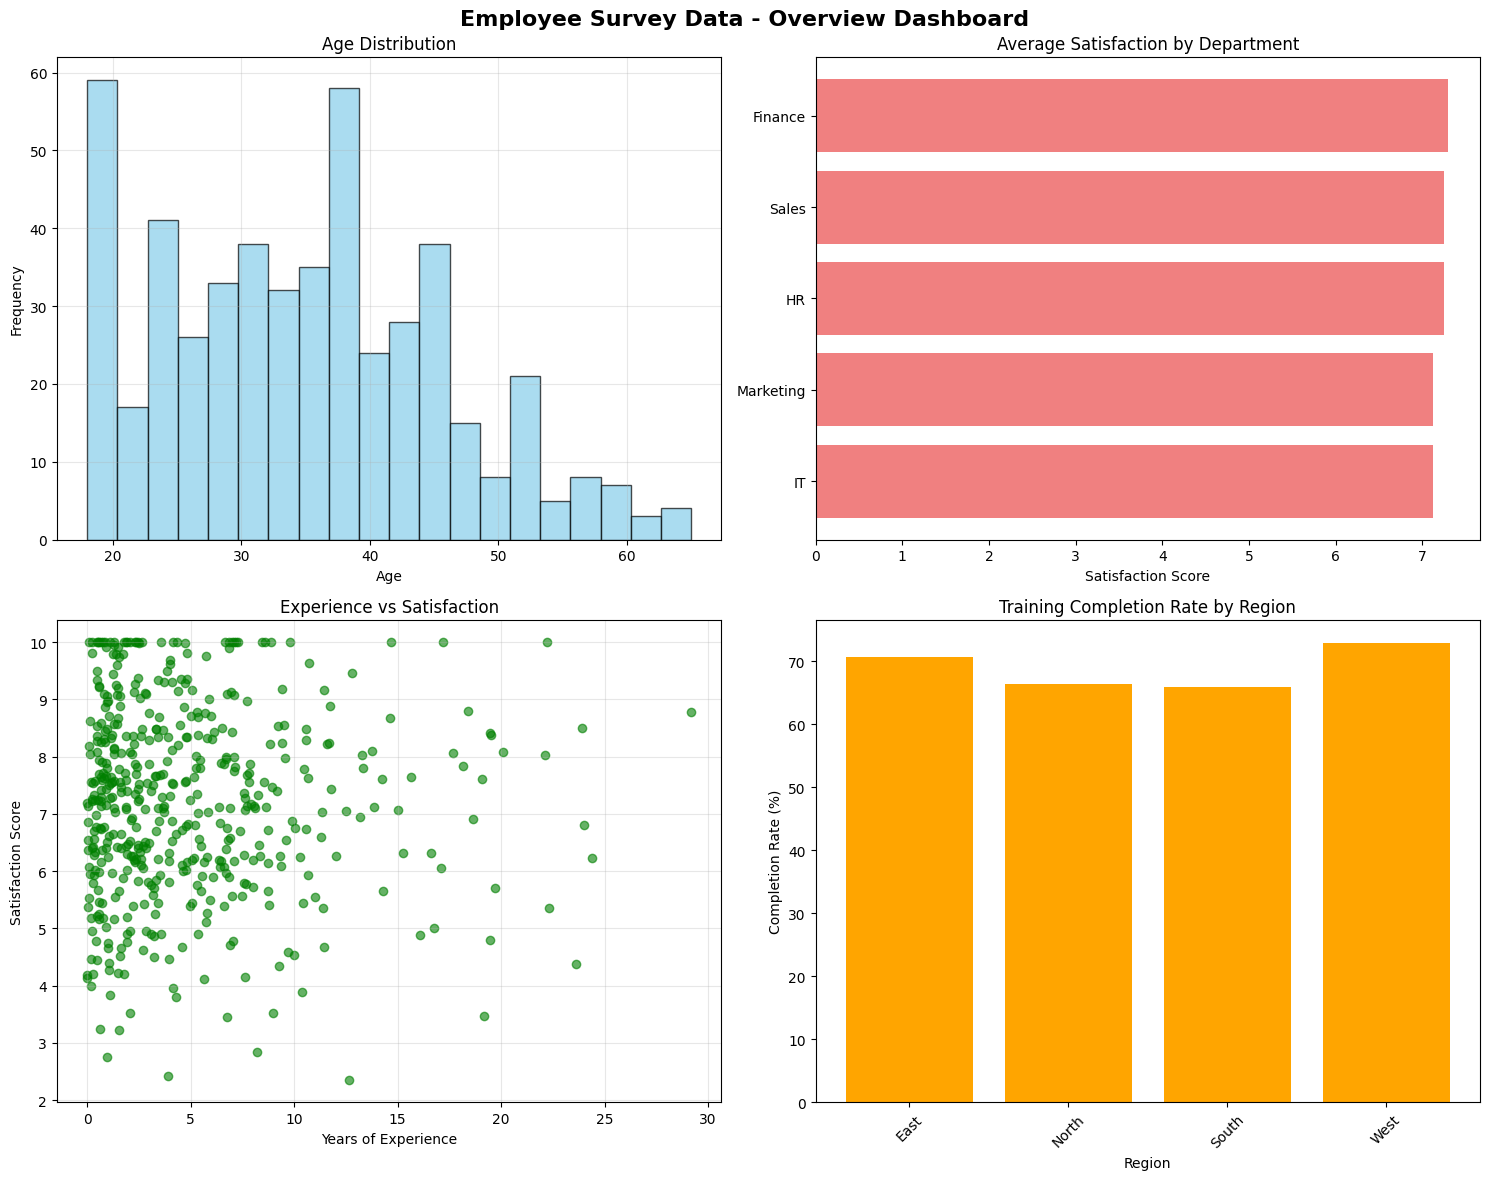

📊 Dashboard created successfully!


In [7]:
# Create comprehensive data overview dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Employee Survey Data - Overview Dashboard', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0, 0].hist(loaded_data['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Satisfaction score by department
dept_satisfaction = loaded_data.groupby('department')['satisfaction_score'].mean().sort_values(ascending=True)
axes[0, 1].barh(dept_satisfaction.index, dept_satisfaction.values, color='lightcoral')
axes[0, 1].set_title('Average Satisfaction by Department')
axes[0, 1].set_xlabel('Satisfaction Score')

# 3. Years experience vs satisfaction
axes[1, 0].scatter(loaded_data['years_experience'], loaded_data['satisfaction_score'], 
                   alpha=0.6, color='green')
axes[1, 0].set_title('Experience vs Satisfaction')
axes[1, 0].set_xlabel('Years of Experience')
axes[1, 0].set_ylabel('Satisfaction Score')
axes[1, 0].grid(True, alpha=0.3)

# 4. Training completion by region
training_by_region = loaded_data.groupby('region')['training_completed'].mean() * 100
axes[1, 1].bar(training_by_region.index, training_by_region.values, color='orange')
axes[1, 1].set_title('Training Completion Rate by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Completion Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📊 Dashboard created successfully!")

## 7. Statistical Analysis

Let's perform some basic statistical tests to understand our data better:

In [8]:
# Correlation analysis function
def perform_correlation_analysis(df, variables, method='pearson'):
    """Perform correlation analysis on specified variables"""
    
    # Filter to numeric variables that exist in the dataset
    available_vars = [var for var in variables if var in df.columns and df[var].dtype in ['int64', 'float64']]
    
    if len(available_vars) < 2:
        return {'error': 'Need at least 2 numeric variables for correlation analysis'}
    
    # Calculate correlation matrix
    corr_data = df[available_vars].corr(method=method)
    
    # Find significant correlations
    significant_correlations = []
    for i in range(len(available_vars)):
        for j in range(i+1, len(available_vars)):
            var1, var2 = available_vars[i], available_vars[j]
            correlation = corr_data.loc[var1, var2]
            
            # Calculate p-value for Pearson correlation
            if method == 'pearson':
                clean_data = df[[var1, var2]].dropna()
                if len(clean_data) > 2:
                    _, p_value = pearsonr(clean_data[var1], clean_data[var2])
                    
                    significant_correlations.append({
                        'variables': f"{var1} vs {var2}",
                        'correlation': correlation,
                        'p_value': p_value,
                        'significant': p_value < 0.05
                    })
    
    return {
        'correlation_matrix': corr_data.to_dict(),
        'significant_correlations': significant_correlations
    }

# Correlation analysis
correlation_result = perform_correlation_analysis(
    loaded_data, 
    variables=['age', 'satisfaction_score', 'years_experience'],
    method='pearson'
)

print("🔗 CORRELATION ANALYSIS")
print("=" * 40)

if 'error' in correlation_result:
    print(f"❌ {correlation_result['error']}")
else:
    print("Correlation Matrix:")
    corr_df = pd.DataFrame(correlation_result['correlation_matrix'])
    print(corr_df.round(3))
    
    print("\n📈 Correlation Results:")
    for corr in correlation_result['significant_correlations']:
        significance = "***" if corr['p_value'] < 0.001 else "**" if corr['p_value'] < 0.01 else "*" if corr['p_value'] < 0.05 else "ns"
        print(f"  {corr['variables']}: r = {corr['correlation']:.3f}, p = {corr['p_value']:.3f} {significance}")
    
    print("\nLegend: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

🔗 CORRELATION ANALYSIS
Correlation Matrix:
                      age  satisfaction_score  years_experience
age                 1.000              -0.066            -0.014
satisfaction_score -0.066               1.000            -0.021
years_experience   -0.014              -0.021             1.000

📈 Correlation Results:
  age vs satisfaction_score: r = -0.066, p = 0.140 ns
  age vs years_experience: r = -0.014, p = 0.759 ns
  satisfaction_score vs years_experience: r = -0.021, p = 0.644 ns

Legend: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


In [9]:
# One-way ANOVA function
def perform_one_way_anova(df, dependent_var, independent_var):
    """Perform one-way ANOVA analysis"""
    
    # Get groups
    groups = []
    group_names = []
    
    for group_name in df[independent_var].unique():
        if pd.notna(group_name):  # Exclude NaN groups
            group_data = df[df[independent_var] == group_name][dependent_var].dropna()
            if len(group_data) > 0:
                groups.append(group_data)
                group_names.append(group_name)
    
    if len(groups) < 2:
        return {'error': 'Need at least 2 groups for ANOVA'}
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Calculate effect size (eta-squared)
    # Total sum of squares
    all_data = df[dependent_var].dropna()
    total_mean = all_data.mean()
    ss_total = ((all_data - total_mean) ** 2).sum()
    
    # Between-group sum of squares
    ss_between = 0
    for i, group in enumerate(groups):
        group_mean = group.mean()
        ss_between += len(group) * ((group_mean - total_mean) ** 2)
    
    # Calculate eta-squared
    eta_squared = ss_between / ss_total if ss_total > 0 else 0
    
    return {
        'f_statistic': f_statistic,
        'p_value': p_value,
        'eta_squared': eta_squared,
        'groups': group_names,
        'group_count': len(groups)
    }

# Compare satisfaction scores between departments using ANOVA
anova_result = perform_one_way_anova(
    loaded_data,
    dependent_var='satisfaction_score',
    independent_var='department'
)

print("📊 ONE-WAY ANOVA RESULTS")
print("=" * 40)
print(f"Research Question: Do satisfaction scores differ significantly between departments?")

if 'error' in anova_result:
    print(f"❌ {anova_result['error']}")
else:
    print(f"\nF-statistic: {anova_result['f_statistic']:.3f}")
    print(f"p-value: {anova_result['p_value']:.3f}")
    print(f"Effect size (η²): {anova_result['eta_squared']:.3f}")
    print(f"Groups analyzed: {anova_result['group_count']} departments")
    
    alpha = 0.05
    if anova_result['p_value'] < alpha:
        print(f"\n✅ Result: Significant difference found (p < {alpha})")
        print("   There are statistically significant differences in satisfaction between departments.")
    else:
        print(f"\n❌ Result: No significant difference (p ≥ {alpha})")
        print("   No statistically significant differences in satisfaction between departments.")
    
    # Show group means
    print("\n📈 Department Satisfaction Means:")
    dept_means = loaded_data.groupby('department')['satisfaction_score'].agg(['mean', 'std', 'count'])
    print(dept_means.round(2))

📊 ONE-WAY ANOVA RESULTS
Research Question: Do satisfaction scores differ significantly between departments?

F-statistic: 0.240
p-value: 0.916
Effect size (η²): 0.002
Groups analyzed: 5 departments

❌ Result: No significant difference (p ≥ 0.05)
   No statistically significant differences in satisfaction between departments.

📈 Department Satisfaction Means:
            mean   std  count
department                   
Finance    7.300 1.710     99
HR         7.250 1.610    111
IT         7.120 1.640     84
Marketing  7.120 1.660    110
Sales      7.250 1.720     96


## 8. Generate Executive Summary

Let's create an executive summary of our analysis findings:

In [10]:
# Generate executive summary function
def generate_executive_summary(df, key_metrics, include_insights=True):
    """Generate comprehensive executive summary"""
    
    summary = {
        'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'dataset_info': {
            'name': 'Employee Survey Data',
            'sample_size': len(df),
            'variables': list(df.columns),
            'time_period': 'Current Analysis'
        },
        'key_findings': [],
        'key_metrics': {},
        'recommendations': []
    }
    
    # Calculate key metrics
    for metric in key_metrics:
        if metric in df.columns:
            if df[metric].dtype in ['int64', 'float64']:
                summary['key_metrics'][metric] = {
                    'mean': df[metric].mean(),
                    'median': df[metric].median(),
                    'std': df[metric].std(),
                    'min': df[metric].min(),
                    'max': df[metric].max()
                }
            elif df[metric].dtype == 'bool':
                summary['key_metrics'][metric] = {
                    'completion_rate': df[metric].mean() * 100,
                    'total_completed': df[metric].sum(),
                    'total_not_completed': (~df[metric]).sum()
                }
    
    # Generate key findings
    if include_insights:
        # Sample size assessment
        if len(df) >= 500:
            summary['key_findings'].append("Large sample size provides robust statistical power")
        elif len(df) >= 100:
            summary['key_findings'].append("Adequate sample size for most statistical analyses")
        else:
            summary['key_findings'].append("Small sample size may limit statistical power")
        
        # Data quality findings
        missing_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
        if missing_pct < 5:
            summary['key_findings'].append("Excellent data quality with minimal missing values")
        elif missing_pct < 15:
            summary['key_findings'].append("Good data quality with some missing values")
        else:
            summary['key_findings'].append("Data quality concerns due to high missing value rate")
        
        # Satisfaction insights (if available)
        if 'satisfaction_score' in df.columns:
            avg_satisfaction = df['satisfaction_score'].mean()
            if avg_satisfaction >= 8:
                summary['key_findings'].append("High employee satisfaction levels observed")
            elif avg_satisfaction >= 6:
                summary['key_findings'].append("Moderate employee satisfaction levels")
            else:
                summary['key_findings'].append("Low employee satisfaction requires attention")
        
        # Department variation (if available)
        if 'department' in df.columns and 'satisfaction_score' in df.columns:
            dept_std = df.groupby('department')['satisfaction_score'].mean().std()
            if dept_std > 1:
                summary['key_findings'].append("Significant variation in satisfaction between departments")
    
    # Generate recommendations
    summary['recommendations'] = [
        "Continue monitoring key performance indicators",
        "Investigate drivers of satisfaction variation",
        "Implement targeted improvement programs",
        "Conduct follow-up analysis to track changes"
    ]
    
    return summary

# Generate executive summary
executive_summary = generate_executive_summary(
    loaded_data,
    key_metrics=['satisfaction_score', 'years_experience', 'training_completed'],
    include_insights=True
)

print("📋 EXECUTIVE SUMMARY")
print("=" * 60)
print(f"Analysis Date: {executive_summary['analysis_date']}")
print(f"Dataset: {executive_summary['dataset_info']['name']}")
print(f"Sample Size: {executive_summary['dataset_info']['sample_size']} responses")

print("\n🎯 KEY FINDINGS:")
for i, finding in enumerate(executive_summary['key_findings'], 1):
    print(f"  {i}. {finding}")

print("\n📊 KEY METRICS:")
for metric, value in executive_summary['key_metrics'].items():
    if isinstance(value, dict):
        print(f"  {metric.replace('_', ' ').title()}:")
        for sub_metric, sub_value in value.items():
            if isinstance(sub_value, float):
                print(f"    {sub_metric.replace('_', ' ').title()}: {sub_value:.2f}")
            else:
                print(f"    {sub_metric.replace('_', ' ').title()}: {sub_value}")
    else:
        if isinstance(value, float):
            print(f"  {metric.replace('_', ' ').title()}: {value:.2f}")
        else:
            print(f"  {metric.replace('_', ' ').title()}: {value}")

print("\n💡 RECOMMENDATIONS:")
for i, recommendation in enumerate(executive_summary['recommendations'], 1):
    print(f"  {i}. {recommendation}")

📋 EXECUTIVE SUMMARY
Analysis Date: 2025-07-19 18:22:01
Dataset: Employee Survey Data
Sample Size: 500 responses

🎯 KEY FINDINGS:
  1. Large sample size provides robust statistical power
  2. Excellent data quality with minimal missing values
  3. Moderate employee satisfaction levels

📊 KEY METRICS:
  Satisfaction Score:
    Mean: 7.21
    Median: 7.25
    Std: 1.66
    Min: 2.35
    Max: 10.00
  Years Experience:
    Mean: 4.89
    Median: 3.34
    Std: 4.92
    Min: 0.00
    Max: 29.18
  Training Completed:
    Completion Rate: 69.00
    Total Completed: 345
    Total Not Completed: 155

💡 RECOMMENDATIONS:
  1. Continue monitoring key performance indicators
  2. Investigate drivers of satisfaction variation
  3. Implement targeted improvement programs
  4. Conduct follow-up analysis to track changes


## 9. Save Your Analysis

Finally, let's save our analysis results for future reference:

In [11]:
# Create results directory
results_dir = Path('../results')
results_dir.mkdir(exist_ok=True)

# Save analysis results
import json
from datetime import datetime

analysis_results = {
    'analysis_date': datetime.now().isoformat(),
    'dataset_info': {
        'shape': loaded_data.shape,
        'columns': list(loaded_data.columns)
    },
    'quality_assessment': quality_report,
    'descriptive_statistics': desc_stats,
    'correlation_analysis': correlation_result,
    'anova_results': anova_result,
    'executive_summary': executive_summary
}

# Save to JSON
results_file = results_dir / f'analysis_results_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json'

with open(results_file, 'w') as f:
    json.dump(analysis_results, f, indent=2, default=str)

print(f"💾 Analysis results saved to: {results_file}")

# Save the current plot
plt.savefig(results_dir / 'overview_dashboard.png', dpi=300, bbox_inches='tight')
print(f"📊 Dashboard saved to: {results_dir / 'overview_dashboard.png'}")

print("\n✅ Analysis complete! You've successfully:")
print("   • Loaded and explored your data")
print("   • Assessed data quality")
print("   • Generated descriptive statistics")
print("   • Created visualizations")
print("   • Performed statistical tests")
print("   • Generated an executive summary")
print("   • Saved all results for future reference")

💾 Analysis results saved to: ..\results\analysis_results_20250719_182201.json
📊 Dashboard saved to: ..\results\overview_dashboard.png

✅ Analysis complete! You've successfully:
   • Loaded and explored your data
   • Assessed data quality
   • Generated descriptive statistics
   • Created visualizations
   • Performed statistical tests
   • Generated an executive summary
   • Saved all results for future reference


<Figure size 640x480 with 0 Axes>

## 🎯 Next Steps

Congratulations! You've completed your first analysis with the Enterprise Data Analysis Cognitive Architecture. Here's what you can explore next:

### 🚀 Advanced Notebooks
- **02_advanced_statistics.ipynb** - Advanced statistical methods and hypothesis testing
- **03_machine_learning.ipynb** - Predictive modeling and ML workflows
- **04_business_intelligence.ipynb** - KPI tracking and executive dashboards
- **05_data_visualization.ipynb** - Advanced visualization techniques

### 📚 Documentation
- **User Guide** - Comprehensive usage examples
- **API Reference** - Detailed function documentation
- **Architecture Guide** - Understanding the cognitive memory system

### 🔧 Customization
- Load your own data files (CSV, Excel, SPSS, databases)
- Customize analysis parameters and visualizations
- Extend functionality with custom plugins

**Happy analyzing!** 📊✨